In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Optional
from numpy.linalg import svd as svd

$\textbf{Exercise 1: Singular Value Mode Convergence}$

In [7]:
#Define the two matrices:


Sxx = np.eye(4)

Syx = np.zeros((7,4))
Syx[:3] = np.array([[1,1,1,1], [1,1,0,0], [0,0,1,1]])
Syx[3:] = Sxx

#Get the singular value decomposition:

U, sa, V = svd(Syx, full_matrices=True)


[2.64575131 1.73205081 1.         1.        ]


$\textbf{Part[a]: Mean weight update equations using Euler forward methods}$

In [3]:
#Euler function:

def euler(f_func, x_0, t_max, dt, eta = .4):
    
    x = x_0
    nsteps = int(t_max / dt)
    
    #A_0 is the SVD of the initial conditions W1_0 and W2_0:
    
    A_0 = np.diag(np.linalg.svd(x_0[1] @ x_0[0])[1])
    
    #The results are stored in an array of shape A_0 x nsteps:
    
    dim1, dim2 = A_0.shape 
    xs = np.zeros((dim1, dim2, nsteps))
    xs[:,:,0] = A_0
    
    i = 1
    t = 0
    
    while i < nsteps:
        
        x = x + eta * f_func(x,t)*dt
        xs[:,:,i] = np.diag(np.linalg.svd(x[1] @ x[0])[1])
        t += dt
        i += 1
    
    return xs

In [4]:
#Define the system of interdependent ODEs as function to feed Euler:

def func(init, t):
    """
    The function defining the system of coupled ODEs
    @params:
    init: the initial conditions of the system
    t: time 
    """
    w1, w2 = init
    
    dw1dt = w2.T @ (Syx - w2 @ w1 @ Sxx)
    dw2dt = (Syx - w2 @ w1 @ Sxx) @ w1.T
    
    #dw_shallow_dt = Syx - w_shallow @ Sxx
    
    return np.array([dw1dt, dw2dt])

def init_cond():
    """
    Returns some initial conditions for testing:
    """
    result = np.array 
    
    return np.array([np.random.normal(0,.01,(16,4)), np.random.normal(0, .01,(7,16))])

$\textbf{Part[b]: Dynamics and Covariance Matrix}$

Text(0, 0.5, 'Error')

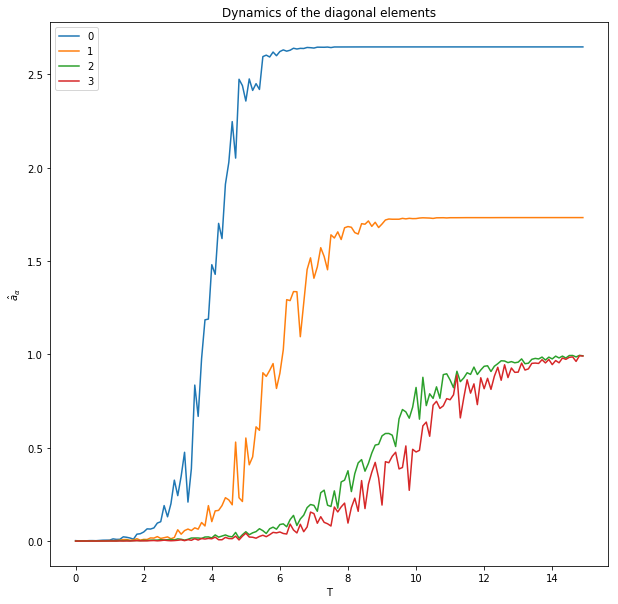

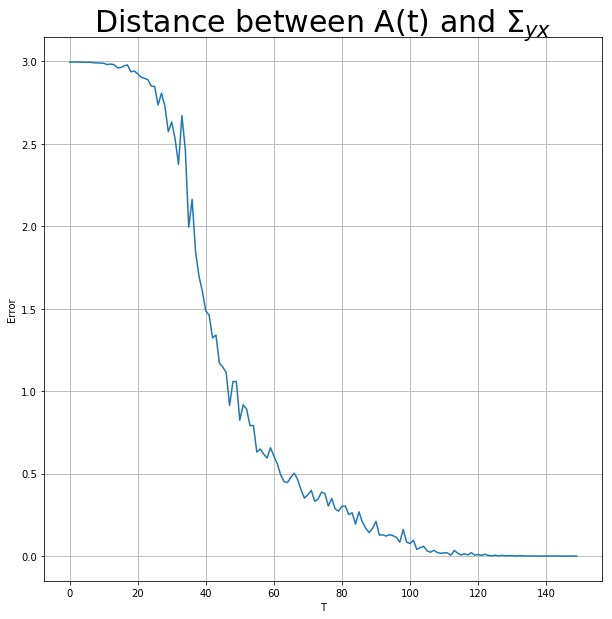

In [5]:
result = np.array([np.diag(euler(func, init_cond(), t_max = 15, dt = .1)[:,:,i]) \
                   for i in range(150)])

#Plot the dynamics of the singular value modes:

plt.figure(figsize = (10,10))

for col in range(4):
    
    plt.plot(np.arange(0,15,.1),result[:,col], label = col)
    plt.title("Dynamics of the diagonal elements")
    plt.grid()
    plt.xlabel("T")
    plt.ylabel(r"$\hat{a}_{\alpha}$")
    plt.legend()
    
#Compute the Euclidean distance between A(t) and [1,1,1,0] = sigma:

plt.figure(figsize = (10,10))

plt.plot(((result - sa)**2).mean(axis = 1)) #Euclidean distance
plt.title("Distance between A(t) and $\Sigma_{yx}$", fontsize = 30)
plt.grid()
plt.xlabel("T")
plt.ylabel("Error")

So we can see that the distance between the weights and the singular values converges to zero with time.

$\textbf{Part[c]: Analytical Solution}$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


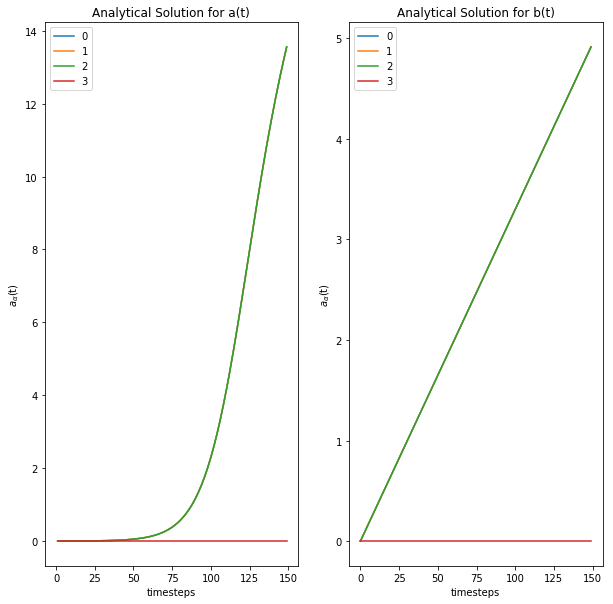

In [6]:
#Define analytical solution for a:

def aanal(t, sa=sa, a0 = .001):
    
    numer = sa * np.exp(2 * sa * .4 * t)
    denom = np.exp(2 * sa * t * .4) - 1 + sa / a0
    
    return numer / denom

aanal_partial = lambda t: aanal(np.array([1,1,1,0]), t)

#Define analytical solution for b:

def banal(t, sa=sa, b0 =.001):
    
    return sa * (1 - np.exp(-0.4 * t)) + b0 * np.exp(-0.4 * t)

banal_partial = lambda t: banal(np.array([1,1,1,0]), t)


def plot_analytical_results():
    
    fig, axs = plt.subplots(1,2, figsize = (10,10), sharex = True)
    
    for col in range(4):
    
        axs[0].plot(np.array(list(map(aanal_partial,np.arange(0,15,.1))))[:,col], \
                   label = col)
        axs[0].set_title("Analytical Solution for a(t)")
        axs[0].set_xlabel("timesteps")
        axs[0].set_ylabel(r"$a_{\alpha}$(t)")
        axs[0].legend()
        
    #axs[0].plot(((result - [1,1,1,0])**2).mean(axis = 1))
        axs[1].plot(np.array(list(map(banal_partial,np.arange(0,15,.1))))[:,col], \
                   label = col)
        axs[1].set_title("Analytical Solution for b(t)")
        axs[1].set_xlabel("timesteps")
        axs[1].set_ylabel(r"$a_{\alpha}$(t)")
        axs[1].legend()
    

plot_analytical_results()